In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
from PIL import Image
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split

%matplotlib inline

In [5]:
train_path = os.getcwd()+'/BasicFinalDatabase/Train'
folders = []
[folders.append('/'+i) for i in sorted(os.listdir(train_path))]
label_map = ['অ','আ','ই ','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ',
             'ক','খ','গ','ঘ','ঙ',
             'চ','ছ','জ','ঝ','ঞ', 
             'ট','ঠ','ড','ঢ','ণ',
             'ত','থ','দ','ধ','ন',
             'প','ফ','ব','ভ','ম',
             'য','র','ল',
             'শ','ষ','স','হ',
             'য়','ড়','ঢ়','ৎ','ং','ঃ','ঁ']
Temp = []
for folder in folders:
    
    images = os.listdir((train_path+folder))
    temp = []
    for image in images:
        img = Image.open(train_path+folder+'/'+image).convert('L')
        img = img.resize((32,32))
        arr = np.array(img)[..., np.newaxis]
        arr = arr / 255.0
        Temp.append(arr)
X_orig = np.stack(Temp)
print(X_orig.shape)

(12000, 32, 32, 1)
0.41700462271497074
0.2604762823875556


In [6]:
Y_orig = []
[Y_orig.extend([bc]*240) for bc in range(len(label_map))]
Y_orig = np.stack(Y_orig)
Y_orig = keras.utils.to_categorical(Y_orig, len(np.unique(Y_orig)))

In [7]:
indices = np.arange(X_orig.shape[0])
np.random.shuffle(indices)
X_orig = X_orig[indices]
Y_orig = Y_orig[indices]

print(X_orig.shape,Y_orig.shape)

(12000, 32, 32, 1) (12000, 50)


In [10]:
test_path = os.getcwd()+'/BasicFinalDatabase/Test'
folders = []
[folders.append('/'+i) for i in sorted(os.listdir(test_path))]

Temp2 = []
for folder in folders:
    
    images = os.listdir((test_path+folder))
    for image in images:
        img = Image.open(test_path+folder+'/'+image).convert('L')
        img = img.resize((32,32))
        arr = np.array(img)[..., np.newaxis]
        arr = arr / 255.0
        Temp2.append(arr)

X_test = np.stack(Temp2)
print(X_test.shape)

(3000, 32, 32, 1)


In [11]:
Y_test = []
[Y_test.extend([bc]*60) for bc in range(len(label_map))]
Y_test = np.stack(Y_test)
Y_test = keras.utils.to_categorical(Y_test, len(np.unique(Y_test)))
print(Y_test.shape)

(3000, 50)


In [12]:
indices = np.arange(X_test.shape[0])
np.random.shuffle(indices)
X_test = X_test[indices]
Y_test = Y_test[indices]

print(X_test.shape,Y_test.shape)

(3000, 32, 32, 1) (3000, 50)


In [13]:
X_train,X_dev,Y_train,Y_dev = train_test_split(X_orig, Y_orig, test_size=0.2, shuffle=False)
X_train.shape,Y_train.shape,X_dev.shape,Y_dev.shape

((9600, 32, 32, 1), (9600, 50), (2400, 32, 32, 1), (2400, 50))

### MODEL 

In [19]:


model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),padding = 'Same',
                 activation='relu',
                 input_shape=(32,32,1)))
model.add(Conv2D(32, (5, 5),padding = 'Same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))#used to handle Overfitting
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='softmax'))

Train on 9600 samples, validate on 2400 samples
Epoch 1/12
9600/9600 [==============================] - 12s 1ms/step - loss: 3.8476 - acc: 0.0639 - val_loss: 2.4384 - val_acc: 0.3254
Epoch 2/12
9600/9600 [==============================] - 11s 1ms/step - loss: 2.0832 - acc: 0.4256 - val_loss: 1.4801 - val_acc: 0.5779
Epoch 3/12
9600/9600 [==============================] - 11s 1ms/step - loss: 1.2336 - acc: 0.6404 - val_loss: 0.9329 - val_acc: 0.7413
Epoch 4/12
9600/9600 [==============================] - 11s 1ms/step - loss: 0.8083 - acc: 0.7574 - val_loss: 0.7561 - val_acc: 0.7958
Epoch 5/12
9600/9600 [==============================] - 11s 1ms/step - loss: 0.6123 - acc: 0.8157 - val_loss: 0.6699 - val_acc: 0.8079
Epoch 6/12
9600/9600 [==============================] - 11s 1ms/step - loss: 0.4867 - acc: 0.8496 - val_loss: 0.6287 - val_acc: 0.8254
Epoch 7/12
9600/9600 [==============================] - 11s 1ms/step - loss: 0.4019 - acc: 0.8736 - val_loss: 0.5493 - val_acc: 0.8437
Epoch 8

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
__________

#### CONFIGURING MODEL

In [62]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [63]:
obj = model.fit(X_train, Y_train,
          batch_size=120,
          epochs=15,
          verbose=1,
          validation_data=(X_dev, Y_dev))
print(obj)

Train on 9600 samples, validate on 2400 samples
Epoch 1/15
9600/9600 [==============================] - 12s 1ms/step - loss: 0.2518 - acc: 0.9185 - val_loss: 0.5517 - val_acc: 0.8467
Epoch 2/15
9600/9600 [==============================] - 12s 1ms/step - loss: 0.1851 - acc: 0.9410 - val_loss: 0.5285 - val_acc: 0.8638
Epoch 3/15
9600/9600 [==============================] - 11s 1ms/step - loss: 0.1655 - acc: 0.9444 - val_loss: 0.5238 - val_acc: 0.8721
Epoch 4/15
9600/9600 [==============================] - 12s 1ms/step - loss: 0.1313 - acc: 0.9539 - val_loss: 0.5429 - val_acc: 0.8729
Epoch 5/15
9600/9600 [==============================] - 12s 1ms/step - loss: 0.1025 - acc: 0.9664 - val_loss: 0.6032 - val_acc: 0.8725
Epoch 6/15
9600/9600 [==============================] - 12s 1ms/step - loss: 0.1131 - acc: 0.9635 - val_loss: 0.5319 - val_acc: 0.8763
Epoch 7/15
9600/9600 [==============================] - 12s 1ms/step - loss: 0.0894 - acc: 0.9705 - val_loss: 0.5520 - val_acc: 0.8771
Epoch 8

In [74]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:-', score[0])
print('Test accuracy:-', score[1])

3000/3000 [==============================] - 1s 440us/step
Test loss:- 0.5343042815327644
Test accuracy:- 0.8869999998410543


#### PLOTTING ACCURACY

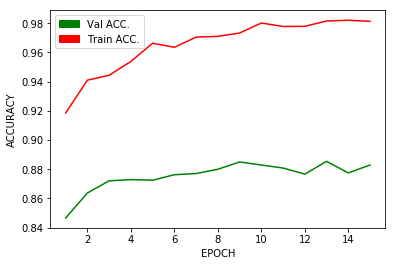

In [69]:
import matplotlib.patches as mpatches
line1=plt.plot(range(1,16),obj.history['acc'],'r-' )
line2=plt.plot(range(1,16),obj.history['val_acc'],'g-')
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY")

red_patch = mpatches.Patch(color='red', label='Train ACC.')
green_patch = mpatches.Patch(color='green', label='Val ACC.')
plt.legend(handles=[green_patch,red_patch], loc=2)


#### PLOTTING ERROR

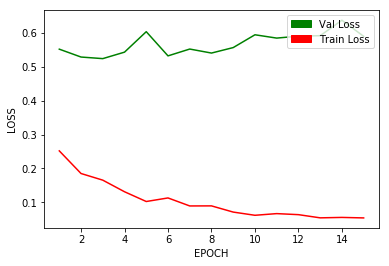

In [70]:
line1=plt.plot(range(1,16),obj.history['loss'],'r-' )
line2=plt.plot(range(1,16),obj.history['val_loss'],'g-')
plt.xlabel("EPOCH")
plt.ylabel("LOSS")

red_patch = mpatches.Patch(color='red', label='Train Loss')
green_patch = mpatches.Patch(color='green', label='Val Loss')
plt.legend(handles=[green_patch,red_patch], loc=1)


In [79]:
#if you want to save model uncomment below code
model.save('bangla-dl.h5')